# Analysis of Fashion Reviews using NLP techniques

# Table of Contents
[Data ingestion](#Data-ingestion)  
[Data preprocessing](#Data-preprocessing)  
[EDA](#EDA)  
[Model Training](#Model-Training)  
[Testing the Model](#Testing-the-Model)  
[Credits](#Credits)  

# Data ingestion

## Introduction

For this notebook, I used a Kaggle public dataset, located [here](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/kernels). Thanks to the Kaggle community and Nick Brooks for providing the dataset.  
In this notebook, we have been given a dataset regarding women's fashion and the reviews for each product. Alongside that, we have been given the following columns:  

**Clothing ID** - Unique ID for each clothing item  
**Age, Title, Review Text** - Title is review title  
**Rating** - A score for the given product, from 1 being Worst to 5 being Best  
**Recommended IND** - A binary variable representing whether or not the customer recommended said product (1 if recommended, 0 otherwise)  
**Positive Feedback Count** - Integer containing the number of customers who thought the review was positive.  
**Division Name, Department Name, Class Name** - Categorical name of product high-level division/department/class names.  


## Initial Thoughts

Judging from the initial impressions on Kaggle, it seems this dataset is a high quality dataset for NLP usage. Our pipeline for this analysis consists of: getting our text data, processing the text, converting the text to features, vectorizing the text, and the training our model based on this vectorized text.  

We also have to choose a problem to solve using this data. I plan to do two different kinds of analysis: a word scatter plot showing the different words contained throughout all of the reviews and their associations. I will then run a clustering algorithm to observe the trends in the words. Second, I will make a classification model that uses the review analysis to predict the recommendation/rating of a product. 

# Data preprocessing

Let's begin by importing the dataset.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/Womens Clothing E-Commerce Reviews.csv')

In [2]:
print(df.head())
print('\nLength of the data is: ' + str(len(df.index)))

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

We have a good amount of data, so let's continue our preprocessing by removing noise from the dataset. Noise in NLP context can be taken as anything that doesn't actively give meaning to the text in our data. Words like 'the', 'it', 'and' etc. don't contribute much meaning and are frequently present in the English language, so by removing stopwords, we can reduce time to perform operations and extract more meaning from our dataset. 

In [3]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

eng_stop_words = set(stopwords.words('english')).union(set(ENGLISH_STOP_WORDS))

In [4]:
print(eng_stop_words)

{'have', 'as', 'hereafter', 'through', 'ain', 'twelve', 'off', 'bottom', 'is', 'con', 'front', 'the', "mustn't", 'needn', 'doesn', 'him', 'every', 'becoming', 'thru', 'under', 'something', 'own', 'together', 'out', 'ie', "wouldn't", 'us', 'fire', 'de', 'formerly', 'seemed', 'very', 'hasn', 'whose', 'go', 'what', 'myself', 'could', 'everything', 'wherein', 'anyway', 'or', 'seeming', 'back', 'after', 'find', 'anything', "she's", 'cant', 'd', "that'll", 'three', 'haven', 'm', 'afterwards', 'sixty', 'more', 'be', 'herein', 'how', 'these', 'hereby', 'during', 'shan', 'whereupon', 'forty', 'against', 'eg', 'on', 'do', 'much', "didn't", 'name', 'don', 'get', 'will', 'enough', 'y', "you'd", 'same', 'still', 'thereby', 'along', 'inc', 'himself', 'whom', 'found', 'doing', 'nine', 'side', 'having', 'former', 'call', 'detail', 'nevertheless', 'show', 'nothing', 'anyhow', 'if', 're', 'whereas', 'before', 'therefore', 'latterly', 'less', 'other', 'namely', 'twenty', 'up', 'beside', 'already', 'weren

I've merged the stopwords of NLTK and Scikit-learn to get a better stopword removal in our own model. We also have to perform steps to trim out columns we don't need in our analysis.

In [5]:
df = df[['Review Text', 'Rating', 'Recommended IND']]
df.head()
df.fillna(0)

,Review Text,Rating,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,I had such high hopes for this dress and reall...,3,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,This shirt is very flattering to all due to th...,5,1
5,"I love tracy reese dresses, but this one is no...",2,0
6,I aded this in my basket at hte last mintue to...,5,1
7,"I ordered this in carbon for store pick up, an...",4,1
8,I love this dress. i usually get an xs but it ...,5,1
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1


We can then iterate over the review text and perform our preprocessing steps. 

In [6]:
import string

df.dropna()
df['Filtered Text'] = df['Review Text'].apply(lambda x: [''.join(item.lower()) for item in str(x).split()])
df['Filtered Text'] = df['Filtered Text'].apply(lambda x: [item.translate(str.maketrans('', '', string.punctuation)) for item in x])
df['Filtered Text'] = df['Filtered Text'].apply(lambda x: ' '.join([word for word in x if word not in (eng_stop_words) and word != " " and word.isdigit() == False]))
df = df.drop(df[df['Filtered Text'] == 'nan'].index)

In [7]:
df['Filtered Text']

0             absolutely wonderful  silky sexy comfortable
1        love dress sooo pretty happened store im glad ...
2        high hopes dress really wanted work initially ...
3        love love love jumpsuit fun flirty fabulous ti...
4        shirt flattering adjustable tie perfect length...
5        love tracy reese dresses petite feet tall usua...
6        aded basket hte mintue look like person store ...
7        ordered carbon store pick ton stuff try used p...
8        love dress usually xs runs little snug bust or...
9        im lbs ordered petite make sure length wasnt l...
10       dress runs small esp zipper area runs ordered ...
11                      dress perfection pretty flattering
12       reliant reviews written savvy shoppers past ri...
13       bought black xs larkspur midi dress didnt both...
14       nice choice holiday gatherings like length gra...
15       took package wanted fit badly tell wouldnt hou...
16       material color nice leg opening large length h.

Now that we've removed the stopwords and the punctuation from our review text, it's time to convert all of the words to their base forms. For example, stopping and stopped would turn into stop, etc. This process can be done in two ways: stemming and lemmatization. I chose lemmatization for this notebook due to the higher accuracy of the algorithm. Stemming, while less accurate, is faster than lemmatization. 

In [8]:
import nltk 
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
tknzr = nltk.tokenize.WhitespaceTokenizer()
lmtzr = WordNetLemmatizer()
df['Filtered Text'] = df['Filtered Text'].apply(lambda x: [lmtzr.lemmatize(word) for word in tknzr.tokenize(x)])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tgmat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df['Filtered Text']

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happened, store, i...
2        [high, hope, dress, really, wanted, work, init...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, adjustable, tie, perfect, ...
5        [love, tracy, reese, dress, petite, foot, tall...
6        [aded, basket, hte, mintue, look, like, person...
7        [ordered, carbon, store, pick, ton, stuff, try...
8        [love, dress, usually, x, run, little, snug, b...
9        [im, lb, ordered, petite, make, sure, length, ...
10       [dress, run, small, esp, zipper, area, run, or...
11                 [dress, perfection, pretty, flattering]
12       [reliant, review, written, savvy, shopper, pas...
13       [bought, black, x, larkspur, midi, dress, didn...
14       [nice, choice, holiday, gathering, like, lengt...
15       [took, package, wanted, fit, badly, tell, woul...
16       [material, color, nice, leg, opening, large, l.

We've now lemmatized our reviews and ordered them into arrays of strings. The next step is to convert these words from letters to numbers so that our models can use them. 

To do this, we first calculate the term frequency (TF) of each of the unique words in our document using CountVectorizer in Python.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,2), min_df=0.005, max_df=0.9, tokenizer=lambda doc:doc, lowercase=False)
cv_vals = cv.fit_transform(df['Filtered Text'])


In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf = False)
tfidf = transformer.fit_transform(cv_vals)



In [12]:
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=cv.get_feature_names())

In [13]:
df = pd.merge(df, df_tfidf, left_index=True, right_index=True)

In [14]:
df.head()

,Review Text,Rating,Recommended IND,Filtered Text,34b,34c,34d,able,absolutely,absolutely love,...,x petite,xl,xx,year,yellow,yes,yesterday,youre,zip,zipper
0,Absolutely wonderful - silky and sexy and comf...,4,1,"[absolutely, wonderful, silky, sexy, comfortable]",0.0,0.0,0.0,0.0,0.384144,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,Love this dress! it's sooo pretty. i happene...,5,1,"[love, dress, sooo, pretty, happened, store, i...",0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,I had such high hopes for this dress and reall...,3,0,"[high, hope, dress, really, wanted, work, init...",0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177994,0.156165
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"[love, love, love, jumpsuit, fun, flirty, fabu...",0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,This shirt is very flattering to all due to th...,5,1,"[shirt, flattering, adjustable, tie, perfect, ...",0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [15]:
df.pop('34b')
df.pop('34c')
df.pop('34d')
df = df.drop(['Review Text', 'Filtered Text'], axis = 1)

In [16]:
df.head()

,Rating,Recommended IND,able,absolutely,absolutely love,actually,add,added,addition,adorable,...,x petite,xl,xx,year,yellow,yes,yesterday,youre,zip,zipper
0,4,1,0.0,0.384144,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,5,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,3,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177994,0.156165
3,5,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,5,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


We've mostly finished preprocessing the data for our NLP analysis. However, let's first gain an intuition about what's going on in the dataset. In the EDA section, we will graphically represent our data in various ways so that we can gain a better understanding of what trends are appearing without any other analysis. 

# EDA

Let's gain some intuition on the trends present within our dataset. First, let's recover the original dataframe and create some charts.

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt

orig_df = pd.read_csv('./datasets/Womens Clothing E-Commerce Reviews.csv')
orig_df.pop('Unnamed: 0')
corr = orig_df.corr()
sns.heatmap(corr)
plt.show()

<Figure size 640x480 with 2 Axes>

From the correlation matrix, we can observe that there is very little correlation between the original columns of the dataset. However, the Recommended IND and the Rating are very positively correlated, which makes sense as people are much more likely to recommend products that they rate highly. 

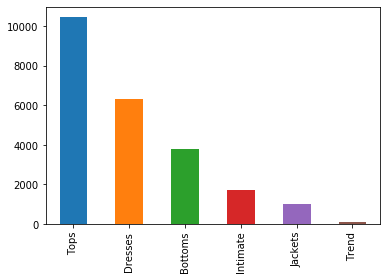

In [18]:
pd.value_counts(orig_df['Department Name']).plot.bar()

The bar chart above shows the amount of sales per department at the given store. The chart indicates more demand for Tops, Dresses, and Bottoms, meaning that stores should be stocking much more of those particular items rather than things like Jackets, etc. 

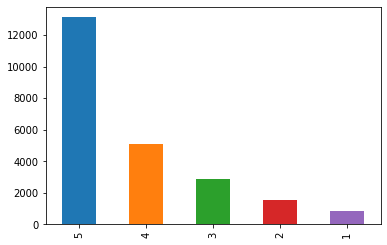

In [19]:
pd.value_counts(orig_df['Rating']).plot.bar()

The chart above contains the rating information for all of the products in the dataset. Oddly enough, customers are much more generous at giving ratings of 5 compared to ratings of 1 or 2. This may be due to the fact that customers who would have given 1 star ratings simply don't bother actually rating the product at the end. The distribution for these ratings is very uneven and skewed towards the 4+ ratings, so this may affect our prediction results if we don't equalize the numbers. 

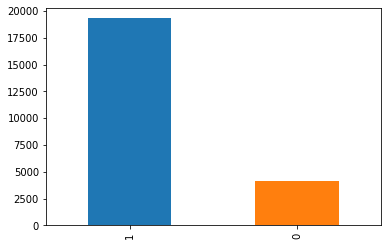

In [20]:
pd.value_counts(orig_df['Recommended IND']).plot.bar()

Similarly to the ratings chart, the recommendation chart also has a very heavy concentration of recommendations compared to no recommendations. Before we make our model, it may be useful to equalize the amounts of recommended/not recommended items to increase the accuracy of our model.

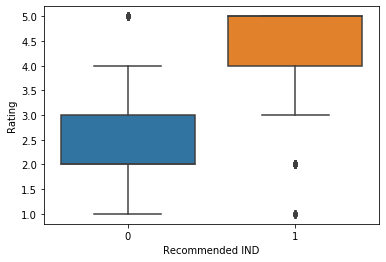

In [21]:
sns.boxplot(x='Recommended IND', y='Rating', data=orig_df)

The above chart displays the rating ranges for products that are recommended/not-recommended. The threshold for being recommended by the customer ranges from 2.0-3.0 rating (not-recommended) to 4.0-5.0 (recommended). There are also outliers, which may come from mistakes when filling out the ratings form or recommendations that were not meant to be taken seriously. 

To get a better view of the words that form good reviews, let's take subsets of our dataset that are recommended and not recommended, then make word clouds out of tose subsets. 

In [22]:
from wordcloud import WordCloud, STOPWORDS

orig_df.dropna()
orig_df['Filtered Text'] = orig_df['Review Text'].apply(lambda x: [''.join(item.lower()) for item in str(x).split()])
orig_df['Filtered Text'] = orig_df['Filtered Text'].apply(lambda x: [item.translate(str.maketrans('', '', string.punctuation)) for item in x])
orig_df['Filtered Text'] = orig_df['Filtered Text'].apply(lambda x: ' '.join([word for word in x if word not in (eng_stop_words) and word != " " and word.isdigit() == False]))
orig_df = orig_df.drop(orig_df[orig_df['Filtered Text'] == 'nan'].index)

recommend_df = orig_df[orig_df['Recommended IND'] == 1]
not_recommend_df = orig_df[orig_df['Recommended IND'] == 0]

review_text_rec = recommend_df.pop('Filtered Text')
review_text_not_rec = not_recommend_df.pop('Filtered Text')

recommend_wc = ""
not_recommend_wc = ""

for sentence in review_text_rec:
    recommend_wc = recommend_wc + str(sentence)
for sentence in review_text_not_rec:
    not_recommend_wc = not_recommend_wc + str(sentence)

stopwords = set(STOPWORDS)

rec_wordcloud = WordCloud(width = 2000, height = 1000, 
                     background_color='white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(recommend_wc)

not_rec_wordcloud = WordCloud(width = 2000, height = 1000, 
                     background_color='white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(not_recommend_wc)

Let's produce the resulting word cloud to see what the recommended and not recommended words are.

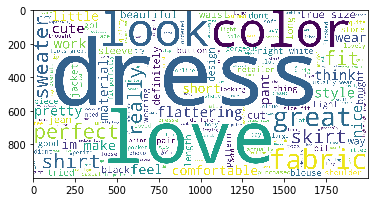

In [23]:
plt.imshow(rec_wordcloud)

The next word cloud is for the not recommended.

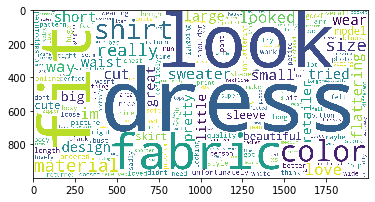

In [24]:
plt.imshow(not_rec_wordcloud)

From the above, it seems as if most of the not recommended reviews come from complaints about size and fit. While this information could simply come from user error (picking the wrong size, etc.), perhaps retailers or clothing manufacturers can use this information to better educate users on proper sizing and styling. For the future, retailers may consider adjusting their sizing criteria to make it easier for the consumer to get the best fit possible on the first try. Improving the first try experience is really important in this case as we observed that consumers often leave little to no information when they have an unpleasant experience. Usually, when there is a bad first experience, there is no chance for a second.

Let's equalize the counts of recommended and not recommended reviews to improve the accuracy of our model. 

In [25]:
recommend_df = df[df['Recommended IND'] == 1]
not_recommend_df = df[df['Recommended IND'] == 0]

recommend_df = recommend_df.loc[:][:len(not_recommend_df.index)]
new_df = pd.concat([recommend_df, not_recommend_df])

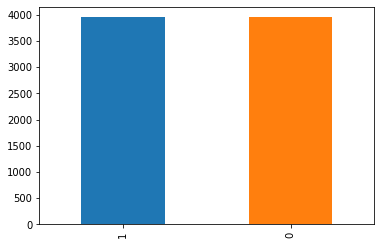

In [26]:
pd.value_counts(new_df['Recommended IND']).plot.bar()

# Model Training

Now that we've done some data analysis, we can begin training our model and trying to predict some results. We begin by using the dataset we prepared earlier during the data preprocessing stage. 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

training, test = train_test_split(df, train_size = 0.7, test_size = 0.3, shuffle=True)

ratings_train_lbl = training.pop('Rating')
ratings_test_lbl = test.pop('Rating')
training_label = training.pop('Recommended IND')
test_label = test.pop('Recommended IND')

We're trying to predict two different things: the first is whether or not a product is recommended or not based on the review text written, the second is predicting the rating of a product between 1-5 also based on the review text. We do this using the TFIDF matrix we generated earlier to numerically represent our text chunks. 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
nbc = MultinomialNB()
LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
SVM = SVC(kernel='rbf', C=1,gamma='auto')
knn = KNeighborsClassifier(n_neighbors=3)

Then, we fit the model to the training data using the training labels. We run the predictions afterward.

In [29]:
# train the models
dtc.fit(training, training_label)
rfc.fit(training, training_label)
nbc.fit(training, training_label)
LR.fit(training, training_label)
SVM.fit(training, training_label)
knn.fit(training, training_label)

# try and predict an outcome from the test set
dtc_predict = dtc.predict(test)
rfc_predict = rfc.predict(test)
nbc_predict = nbc.predict(test)
LR_predict = LR.predict(test)
SVM_predict = SVM.predict(test)
knn_predict = knn.predict(test)

c:\users\tgmat\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


We store the accuracy values for each algorithm in a dictionary for future use. The pprint package is used to nicely format the dictionary when we print it.

In [30]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
# judge accuracy using built-in function
accuracy = dict()
accuracy['Naive_bayes'] = accuracy_score(test_label, nbc_predict)
accuracy['DecisionTree'] = accuracy_score(test_label, dtc_predict)
accuracy['RandomForest'] = accuracy_score(test_label,rfc_predict)
accuracy['support_vector_Machines'] = accuracy_score(test_label,SVM_predict)
accuracy['Linear Regression'] = accuracy_score(test_label,LR_predict)
accuracy['KNN'] = accuracy_score(test_label,knn_predict)

pp.pprint(accuracy)

{   'DecisionTree': 0.7112740604949588,
    'KNN': 0.7997250229147571,
    'Linear Regression': 0.8168347082187596,
    'Naive_bayes': 0.8171402383134739,
    'RandomForest': 0.8032386190039719,
    'support_vector_Machines': 0.8171402383134739}


In [31]:
max_accuracy = max(accuracy,key=accuracy.get)

print('The best performing algorithm is: ' + str(max_accuracy))

The best performing algorithm is: Naive_bayes


Let's make a bar plot of the various algorithms and their respective accuracies. 

,Algorithms,Percentage
0,Naive_bayes,0.817140
1,DecisionTree,0.711274
2,RandomForest,0.803239
3,support_vector_Machines,0.817140
4,Linear Regression,0.816835
5,KNN,0.799725


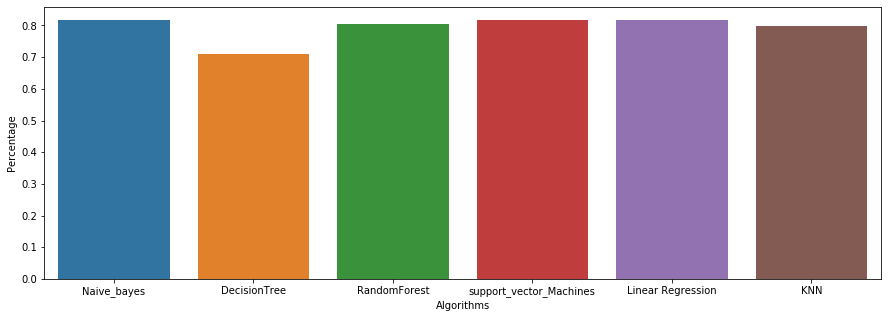

In [32]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))

new_df=pd.DataFrame(list(accuracy.items()),columns=['Algorithms','Percentage'])
display(new_df)
sns.barplot(x="Algorithms", y="Percentage", data=new_df,ax=ax1);

While the results haven't changed, the ~82% accuracy from the Multinomial Naive Bayes algorithm makes it so that we have a very reliable prediction tool for telling whether or not a product will be recommended based purely on the review text. It's not perfect, but it's still a very good model. If we normalize the difference between the recommended and not recommended data subsets, we might be able to get a more accurate model. 

# Testing the Model

Let's try running the predictions on the ratings of the products instead. Since there are 5 possible ratings to choose from, a person has a 20% chance of getting the rating right randomly. If our model can beat 20%, we are doing better than the average scenario!

In [33]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
nbc = MultinomialNB()
LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
SVM = SVC(kernel='rbf', C=1,gamma='auto')
knn = KNeighborsClassifier(n_neighbors=3)

# train the models
dtc.fit(training, ratings_train_lbl)
rfc.fit(training, ratings_train_lbl)
nbc.fit(training, ratings_train_lbl)
LR.fit(training, ratings_train_lbl)
SVM.fit(training, ratings_train_lbl)
knn.fit(training, ratings_train_lbl)

# try and predict an outcome from the test set
dtc_predict = dtc.predict(test)
rfc_predict = rfc.predict(test)
nbc_predict = nbc.predict(test)
LR_predict = LR.predict(test)
SVM_predict = SVM.predict(test)
knn_predict = knn.predict(test)

# judge accuracy using built-in function
accuracy_rating = dict()
accuracy_rating['Naive_bayes'] = accuracy_score(ratings_test_lbl, nbc_predict)
accuracy_rating['DecisionTree'] = accuracy_score(ratings_test_lbl, dtc_predict)
accuracy_rating['RandomForest'] = accuracy_score(ratings_test_lbl,rfc_predict)
accuracy_rating['support_vector_Machines'] = accuracy_score(ratings_test_lbl,SVM_predict)
accuracy_rating['Linear Regression'] = accuracy_score(ratings_test_lbl,LR_predict)
accuracy_rating['KNN'] = accuracy_score(ratings_test_lbl,knn_predict)

pp.pprint(accuracy_rating)

c:\users\tgmat\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\tgmat\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


{   'DecisionTree': 0.3921478765658417,
    'KNN': 0.47280782157042467,
    'Linear Regression': 0.5487320501069355,
    'Naive_bayes': 0.5577451879010082,
    'RandomForest': 0.5116101435991445,
    'support_vector_Machines': 0.5577451879010082}


In [34]:
max_accuracy = max(accuracy_rating,key=accuracy_rating.get)

print('The best performing algorithm is: ' + str(max_accuracy))

The best performing algorithm is: Naive_bayes


While the accuracy isn't extremely high, an average accuracy of about 55% is much better than purely guessing out of 5 options. The inaccuracy compared to the other dataset also comes from the outnumbering of 5 ratings compared to any of the 3/2/1 ratings in the dataset. There are also a lot of common words between the 4/5 star ratings, so NLP classification is going to be difficult because there aren't many unique features among the positive reviews.

Let's create a bar plot to compare the accuracies of the different algorithms. 

,Algorithms,Percentage
0,Naive_bayes,0.557745
1,DecisionTree,0.392148
2,RandomForest,0.511610
3,support_vector_Machines,0.557745
4,Linear Regression,0.548732
5,KNN,0.472808


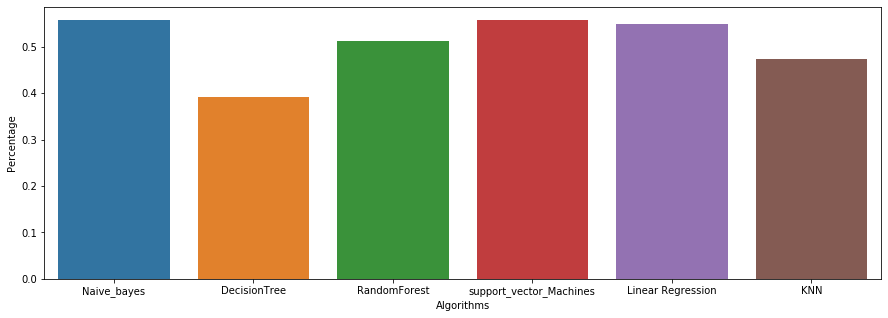

In [35]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))

new_df=pd.DataFrame(list(accuracy_rating.items()),columns=['Algorithms','Percentage'])
display(new_df)
sns.barplot(x="Algorithms", y="Percentage", data=new_df,ax=ax1);

We can choose Naive Bayes as our most accurate algorithm, and we can adjust our dataset to increase our model accuracy further by equalizing the number of reviews based on the ratings (ex. 1000 reviews each for 5/4/3/2/1 rating).

# Credits

Thanks again to the Kaggle community and the publisher of the dataset for helping me with my analysis. 